In [1]:
from decimal import Decimal # for filenames

import pdb #Equivalent of keyboard in MATLAB, just add "pdb.set_trace()"

import os
import sys

In [13]:
###############################################################################
#                       HyperParameters and RunOptions                        #
###############################################################################
class Hyperparameters:
    max_hidden_layers = 8# For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  =100
    activation        = 'elu'
    classification_act= 'linear'
    model_constraint  =  1
    regularization    = 0.000
    manifold          = 0.00
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 500
    num_epochs        = 2000
    
    num_networks      = 6
    

In [14]:
import tensorflow as tf
from mat4py import loadmat
import numpy as np
import pandas as pd
from Utilities.plotting_sine import plot_sine
from Utilities.get_image_data import load_data
from Utilities.form_train_val_test_batches import form_train_val_test_batches
from Utilities.NN_FC_layerwise import FCLayerwise
from Utilities.NN_FC_layerwise_new import FCLayerwise_new
from Utilities.NETW import Final
from Utilities.Net import Final_Network
from Utilities.Net_new import Final_Network_ALGO_II
from Utilities.create_data import create_new
from Utilities.create_data_multiply import create_new_multiply
from Utilities.L2_error_computation import error_L2
from Utilities.loss_and_accuracies import data_loss_classification, data_loss_regression
from Utilities.manifold_regularization import manifold_classification
from Utilities.model_constraint import compute_interior_loss
from Utilities.model_constraint_weak import compute_interior_loss_weak
from Utilities.manifold_regularization_new import manifold_classification_new
from Utilities.optimize_layerwise import optimize
from Utilities.optimize_step_II import optimize_step
from Utilities.additive_output import net_output 
from Utilities.plot_and_save_figures_layerwise import plot_fig
from joblib import Parallel, delayed
import multiprocessing
import random

In [15]:
class Hyperparameters_new:
    max_hidden_layers = 3 # For this architecture, need at least 2. One for the mapping to the feature space, one as a trainable hidden layer. EXCLUDES MAPPING BACK TO DATA SPACE
    num_hidden_nodes  = 20
    activation        = 'relu'
    classification_act= 'linear'
    regularization    = 0.000
    manifold          = 0.001
    model_constraint  =  300
    node_TOL          = 1e-4
    error_TOL         = 1e-4
    batch_size        = 500
    num_epochs        = 2000

In [16]:
class RunOptions:
    def __init__(self):    
        #=== Choose Which GPU to Use ===#
        self.which_gpu = '1'
        
        #=== Use L_1 Regularization ===#
        self.use_L1 = 1
        
        #=== Choose Data Set ===#
        self.data_MNIST = 0
        self.data_CIFAR10 = 0 
        self.data_CIFAR100 = 0
        self.data_regression=1
        
        #=== Random Seed ===#
        self.random_seed = 1234


In [17]:
###############################################################################
#                                 File Paths                                  #
###############################################################################         
class FilePaths():    
    def __init__(self, hyperp, run_options):  
        #=== Declaring File Name Components ===# 
        self.NN_type = 'FC'
        if run_options.data_MNIST == 1:
            self.dataset = 'MNIST'
        if run_options.data_CIFAR10 == 1:
            self.dataset = 'CIFAR10'
        if run_options.data_CIFAR100 == 1:
            self.dataset = 'CIFAR100'
        if run_options.data_regression == 1:
            self.dataset = 'Abalone'
        if hyperp.regularization >= 1:
            hyperp.regularization = int(hyperp.regularization)
            regularization_string = str(hyperp.regularization)
        else:
            regularization_string = str(hyperp.regularization)
            regularization_string = 'pt' + regularization_string[2:]                        
        node_TOL_string = str('%.2e' %Decimal(hyperp.node_TOL))
        node_TOL_string = node_TOL_string[-1]
        error_TOL_string = str('%.2e' %Decimal(hyperp.error_TOL))
        error_TOL_string = error_TOL_string[-1]
        
        #=== File Name ===#
        if run_options.use_L1 == 0:
            self.filename = self.dataset + '_' + self.NN_type + '_mhl%d_hl%d_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)
        else:
            self.filename = self.dataset + '_' + self.NN_type + '_L1_mhl%d_hl%d_r%s_nTOL%s_eTOL%s_b%d_e%d' %(hyperp.max_hidden_layers, hyperp.num_hidden_nodes, regularization_string, node_TOL_string, error_TOL_string, hyperp.batch_size, hyperp.num_epochs)

        #=== Saving Trained Neural Network and Tensorboard ===#
        #self.NN_savefile_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Trained_NNs/' + self.filename # Since we need to save four different types of files to save a neural network model, we need to create a new folder for each model
        self.NN_savefile_directory =  self.filename
        self.NN_savefile_name = self.NN_savefile_directory + '/' + self.filename # The file path and name for the four files
        #self.tensorboard_directory = 'C:/Users/Chandradut/Desktop/Sparse training/Tensorboard/' + self.filename

###############################################################################



ListWrapper([2, 100, 100, 1])
Beginning Training
            Epoch 0            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Model: "fc_layerwise_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
W2 (Dense)                   multiple                  10100     
_________________________________________________________________
W3 (Dense)                   multiple                  10100     
_________________________________________________________________
W4 (Dense)                   multiple                  10100     
_________________________________________________________________
W5 (Dense)                   multiple                  10100     
_________________________________________________________________
W6 (Dense)                   multiple                  10100     
_________________________________________

Time per Batch: 0.24
Time per Epoch: 2.37

Training Set: Loss: 5.336e+01, Accuracy: 47.575
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.705

Previous Layer Relative # of 0s: 0.0000000

            Epoch 16            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.33

Training Set: Loss: 5.373e+01, Accuracy: 48.051
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.667

Previous Layer Relative # of 0s: 0.0000000

            Epoch 17            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.27

Training Set: Loss: 4.992e+01, Accuracy: 44.167
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.367

Previous Layer Relative # of 0s: 0.000

Time per Epoch: 2.16

Training Set: Loss: 3.828e+01, Accuracy: 34.278
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.253

Previous Layer Relative # of 0s: 0.0000000

            Epoch 34            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.19

Training Set: Loss: 4.189e+01, Accuracy: 38.887
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.261

Previous Layer Relative # of 0s: 0.0000000

            Epoch 35            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.11

Training Set: Loss: 3.799e+01, Accuracy: 34.039
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.231

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Batch: 0.20
Time per Epoch: 2.13

Training Set: Loss: 3.738e+01, Accuracy: 34.834
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.825

Previous Layer Relative # of 0s: 0.0000000

            Epoch 53            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.16

Training Set: Loss: 3.463e+01, Accuracy: 31.665
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.323

Previous Layer Relative # of 0s: 0.0000000

            Epoch 54            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.17

Training Set: Loss: 3.742e+01, Accuracy: 35.109
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.826

Previous Layer Relative # of 0s: 0.000

Time per Epoch: 2.15

Training Set: Loss: 2.957e+01, Accuracy: 27.119
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.749

Previous Layer Relative # of 0s: 0.0000000

            Epoch 71            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.15

Training Set: Loss: 3.153e+01, Accuracy: 28.906
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.664

Previous Layer Relative # of 0s: 0.0000000

            Epoch 72            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.16

Training Set: Loss: 3.264e+01, Accuracy: 29.840
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.087

Previous Layer Relative # of 0s: 0.0000000

            Epo

Time per Batch: 0.21
Time per Epoch: 2.18

Training Set: Loss: 2.841e+01, Accuracy: 25.650
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.004

Previous Layer Relative # of 0s: 0.0000000

            Epoch 90            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.16

Training Set: Loss: 2.924e+01, Accuracy: 26.347
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.070

Previous Layer Relative # of 0s: 0.0000000

            Epoch 91            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.31

Training Set: Loss: 2.814e+01, Accuracy: 25.250
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.787

Previous Layer Relative # of 0s: 0.000

Time per Batch: 0.19
Time per Epoch: 2.12

Training Set: Loss: 1.924e+01, Accuracy: 15.884
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.105

Previous Layer Relative # of 0s: 0.0000000

            Epoch 108            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.13

Training Set: Loss: 1.777e+01, Accuracy: 14.426
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.523

Previous Layer Relative # of 0s: 0.0000000

            Epoch 109            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.20

Training Set: Loss: 1.864e+01, Accuracy: 15.062
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.274

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.22
Time per Epoch: 2.24

Training Set: Loss: 1.759e+01, Accuracy: 13.891
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.151

Previous Layer Relative # of 0s: 0.0000000

            Epoch 126            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.16

Training Set: Loss: 1.782e+01, Accuracy: 14.646
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.153

Previous Layer Relative # of 0s: 0.0000000

            Epoch 127            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.22

Training Set: Loss: 1.653e+01, Accuracy: 13.352
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.240

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.16

Training Set: Loss: 1.630e+01, Accuracy: 13.351
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.918

Previous Layer Relative # of 0s: 0.0000000

            Epoch 144            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.15

Training Set: Loss: 1.727e+01, Accuracy: 14.329
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.007

Previous Layer Relative # of 0s: 0.0000000

            Epoch 145            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.12

Training Set: Loss: 1.612e+01, Accuracy: 13.275
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.883

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.21
Time per Epoch: 2.17

Training Set: Loss: 1.639e+01, Accuracy: 13.508
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.742

Previous Layer Relative # of 0s: 0.0000000

            Epoch 162            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.15

Training Set: Loss: 1.519e+01, Accuracy: 12.339
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.154

Previous Layer Relative # of 0s: 0.0000000

            Epoch 163            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.16

Training Set: Loss: 1.458e+01, Accuracy: 11.766
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.427

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.21

Training Set: Loss: 1.422e+01, Accuracy: 11.479
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.656

Previous Layer Relative # of 0s: 0.0000000

            Epoch 180            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.21

Training Set: Loss: 1.469e+01, Accuracy: 12.027
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.690

Previous Layer Relative # of 0s: 0.0000000

            Epoch 181            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.38

Training Set: Loss: 1.519e+01, Accuracy: 12.430
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.766

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.37

Training Set: Loss: 1.463e+01, Accuracy: 11.892
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.135

Previous Layer Relative # of 0s: 0.0000000

            Epoch 198            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.34

Training Set: Loss: 1.500e+01, Accuracy: 12.332
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.566

Previous Layer Relative # of 0s: 0.0000000

            Epoch 199            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.20

Training Set: Loss: 1.556e+01, Accuracy: 12.792
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.054

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.19

Training Set: Loss: 1.456e+01, Accuracy: 11.870
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.667

Previous Layer Relative # of 0s: 0.0000000

            Epoch 216            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.12

Training Set: Loss: 1.492e+01, Accuracy: 12.129
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.945

Previous Layer Relative # of 0s: 0.0000000

            Epoch 217            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.13

Training Set: Loss: 1.651e+01, Accuracy: 13.690
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.536

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.09

Training Set: Loss: 1.414e+01, Accuracy: 11.423
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.541

Previous Layer Relative # of 0s: 0.0000000

            Epoch 234            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.13

Training Set: Loss: 1.440e+01, Accuracy: 11.634
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.441

Previous Layer Relative # of 0s: 0.0000000

            Epoch 235            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.21

Training Set: Loss: 1.518e+01, Accuracy: 12.339
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.366

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.18

Training Set: Loss: 1.502e+01, Accuracy: 12.205
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.611

Previous Layer Relative # of 0s: 0.0000000

            Epoch 252            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.10

Training Set: Loss: 1.595e+01, Accuracy: 13.088
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.020

Previous Layer Relative # of 0s: 0.0000000

            Epoch 253            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.16

Training Set: Loss: 1.531e+01, Accuracy: 12.603
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.492

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.09

Training Set: Loss: 1.412e+01, Accuracy: 11.326
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.117

Previous Layer Relative # of 0s: 0.0000000

            Epoch 270            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.14

Training Set: Loss: 1.469e+01, Accuracy: 12.021
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.511

Previous Layer Relative # of 0s: 0.0000000

            Epoch 271            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.19

Training Set: Loss: 1.548e+01, Accuracy: 12.630
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.238

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.16

Training Set: Loss: 1.508e+01, Accuracy: 12.376
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.422

Previous Layer Relative # of 0s: 0.0000000

            Epoch 288            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.21

Training Set: Loss: 1.396e+01, Accuracy: 11.193
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.688

Previous Layer Relative # of 0s: 0.0000000

            Epoch 289            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.11

Training Set: Loss: 1.382e+01, Accuracy: 11.106
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.482

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.21

Training Set: Loss: 1.383e+01, Accuracy: 11.077
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.720

Previous Layer Relative # of 0s: 0.0000000

            Epoch 306            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.22

Training Set: Loss: 1.552e+01, Accuracy: 12.904
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.493

Previous Layer Relative # of 0s: 0.0000000

            Epoch 307            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.18

Training Set: Loss: 1.520e+01, Accuracy: 12.316
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.276

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.16

Training Set: Loss: 1.532e+01, Accuracy: 12.659
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.412

Previous Layer Relative # of 0s: 0.0000000

            Epoch 324            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.09

Training Set: Loss: 1.484e+01, Accuracy: 11.975
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.013

Previous Layer Relative # of 0s: 0.0000000

            Epoch 325            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.13

Training Set: Loss: 1.505e+01, Accuracy: 12.331
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.477

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.19

Training Set: Loss: 1.462e+01, Accuracy: 11.922
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.583

Previous Layer Relative # of 0s: 0.0000000

            Epoch 342            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.13

Training Set: Loss: 1.461e+01, Accuracy: 11.919
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.779

Previous Layer Relative # of 0s: 0.0000000

            Epoch 343            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.19

Training Set: Loss: 1.454e+01, Accuracy: 11.823
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.545

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.14

Training Set: Loss: 1.356e+01, Accuracy: 10.944
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.648

Previous Layer Relative # of 0s: 0.0000000

            Epoch 360            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.13

Training Set: Loss: 1.395e+01, Accuracy: 11.265
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.905

Previous Layer Relative # of 0s: 0.0000000

            Epoch 361            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.15

Training Set: Loss: 1.428e+01, Accuracy: 11.604
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.631

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.17

Training Set: Loss: 1.458e+01, Accuracy: 11.915
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.680

Previous Layer Relative # of 0s: 0.0000000

            Epoch 378            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.20

Training Set: Loss: 1.356e+01, Accuracy: 11.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.942

Previous Layer Relative # of 0s: 0.0000000

            Epoch 379            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.16

Training Set: Loss: 1.401e+01, Accuracy: 11.337
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.589

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.14

Training Set: Loss: 1.330e+01, Accuracy: 10.647
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.532

Previous Layer Relative # of 0s: 0.0000000

            Epoch 396            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.25

Training Set: Loss: 1.391e+01, Accuracy: 11.318
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.091

Previous Layer Relative # of 0s: 0.0000000

            Epoch 397            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.15

Training Set: Loss: 1.460e+01, Accuracy: 11.867
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.545

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.26

Training Set: Loss: 1.378e+01, Accuracy: 11.238
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.647

Previous Layer Relative # of 0s: 0.0000000

            Epoch 414            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.14

Training Set: Loss: 1.431e+01, Accuracy: 11.535
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.008

Previous Layer Relative # of 0s: 0.0000000

            Epoch 415            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.18

Training Set: Loss: 1.445e+01, Accuracy: 11.832
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.426

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.447e+01, Accuracy: 11.753
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.854

Previous Layer Relative # of 0s: 0.0000000

            Epoch 432            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.20

Training Set: Loss: 1.410e+01, Accuracy: 11.517
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.434

Previous Layer Relative # of 0s: 0.0000000

            Epoch 433            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.14

Training Set: Loss: 1.465e+01, Accuracy: 11.929
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.045

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.12

Training Set: Loss: 1.420e+01, Accuracy: 11.505
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.843

Previous Layer Relative # of 0s: 0.0000000

            Epoch 450            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.21

Training Set: Loss: 1.442e+01, Accuracy: 11.643
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.136

Previous Layer Relative # of 0s: 0.0000000

            Epoch 451            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.26

Training Set: Loss: 1.408e+01, Accuracy: 11.311
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.850

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.422e+01, Accuracy: 11.539
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.424

Previous Layer Relative # of 0s: 0.0000000

            Epoch 468            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.16

Training Set: Loss: 1.326e+01, Accuracy: 10.509
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.969

Previous Layer Relative # of 0s: 0.0000000

            Epoch 469            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.11

Training Set: Loss: 1.351e+01, Accuracy: 10.878
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.459

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.21
Time per Epoch: 2.17

Training Set: Loss: 1.338e+01, Accuracy: 10.692
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.958

Previous Layer Relative # of 0s: 0.0000000

            Epoch 486            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.15

Training Set: Loss: 1.446e+01, Accuracy: 11.769
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.401

Previous Layer Relative # of 0s: 0.0000000

            Epoch 487            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.412e+01, Accuracy: 11.446
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.903

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.12

Training Set: Loss: 1.440e+01, Accuracy: 11.652
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.774

Previous Layer Relative # of 0s: 0.0000000

            Epoch 504            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.09

Training Set: Loss: 1.344e+01, Accuracy: 10.771
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.593

Previous Layer Relative # of 0s: 0.0000000

            Epoch 505            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.10

Training Set: Loss: 1.349e+01, Accuracy: 10.818
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.610

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.25

Training Set: Loss: 1.426e+01, Accuracy: 11.587
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.739

Previous Layer Relative # of 0s: 0.0000000

            Epoch 522            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.17

Training Set: Loss: 1.415e+01, Accuracy: 11.464
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.627

Previous Layer Relative # of 0s: 0.0000000

            Epoch 523            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.17

Training Set: Loss: 1.352e+01, Accuracy: 10.883
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.636

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.22

Training Set: Loss: 1.357e+01, Accuracy: 10.888
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.522

Previous Layer Relative # of 0s: 0.0000000

            Epoch 540            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.25

Training Set: Loss: 1.404e+01, Accuracy: 11.382
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.762

Previous Layer Relative # of 0s: 0.0000000

            Epoch 541            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.29

Training Set: Loss: 1.312e+01, Accuracy: 10.494
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.512

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.21

Training Set: Loss: 1.372e+01, Accuracy: 11.163
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.859

Previous Layer Relative # of 0s: 0.0000000

            Epoch 558            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.15

Training Set: Loss: 1.376e+01, Accuracy: 11.077
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.623

Previous Layer Relative # of 0s: 0.0000000

            Epoch 559            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.367e+01, Accuracy: 11.060
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.717

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.21
Time per Epoch: 2.28

Training Set: Loss: 1.332e+01, Accuracy: 10.706
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.303

Previous Layer Relative # of 0s: 0.0000000

            Epoch 576            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.23

Training Set: Loss: 1.355e+01, Accuracy: 10.955
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.709

Previous Layer Relative # of 0s: 0.0000000

            Epoch 577            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.26

Training Set: Loss: 1.401e+01, Accuracy: 11.292
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.575

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.15

Training Set: Loss: 1.332e+01, Accuracy: 10.606
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.995

Previous Layer Relative # of 0s: 0.0000000

            Epoch 594            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.16

Training Set: Loss: 1.302e+01, Accuracy: 10.347
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.627

Previous Layer Relative # of 0s: 0.0000000

            Epoch 595            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.24

Training Set: Loss: 1.352e+01, Accuracy: 10.901
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.764

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.14

Training Set: Loss: 1.402e+01, Accuracy: 11.365
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.640

Previous Layer Relative # of 0s: 0.0000000

            Epoch 612            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.24

Training Set: Loss: 1.381e+01, Accuracy: 11.190
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.965

Previous Layer Relative # of 0s: 0.0000000

            Epoch 613            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.18

Training Set: Loss: 1.378e+01, Accuracy: 11.056
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.567

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.24

Training Set: Loss: 1.315e+01, Accuracy: 10.511
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.749

Previous Layer Relative # of 0s: 0.0000000

            Epoch 630            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.21

Training Set: Loss: 1.325e+01, Accuracy: 10.604
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.008

Previous Layer Relative # of 0s: 0.0000000

            Epoch 631            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.21

Training Set: Loss: 1.317e+01, Accuracy: 10.482
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.663

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.21

Training Set: Loss: 1.324e+01, Accuracy: 10.493
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.060

Previous Layer Relative # of 0s: 0.0000000

            Epoch 648            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.396e+01, Accuracy: 11.250
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.523

Previous Layer Relative # of 0s: 0.0000000

            Epoch 649            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.13

Training Set: Loss: 1.347e+01, Accuracy: 10.840
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.112

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.17

Training Set: Loss: 1.329e+01, Accuracy: 10.725
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.781

Previous Layer Relative # of 0s: 0.0000000

            Epoch 666            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.19

Training Set: Loss: 1.360e+01, Accuracy: 10.907
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.524

Previous Layer Relative # of 0s: 0.0000000

            Epoch 667            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.18

Training Set: Loss: 1.379e+01, Accuracy: 11.118
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.911

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.18

Training Set: Loss: 1.367e+01, Accuracy: 10.997
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.726

Previous Layer Relative # of 0s: 0.0000000

            Epoch 684            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.12

Training Set: Loss: 1.394e+01, Accuracy: 11.257
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.788

Previous Layer Relative # of 0s: 0.0000000

            Epoch 685            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.17

Training Set: Loss: 1.346e+01, Accuracy: 10.758
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.770

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.13

Training Set: Loss: 1.313e+01, Accuracy: 10.473
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.815

Previous Layer Relative # of 0s: 0.0000000

            Epoch 702            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.21

Training Set: Loss: 1.351e+01, Accuracy: 10.815
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.915

Previous Layer Relative # of 0s: 0.0000000

            Epoch 703            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.20

Training Set: Loss: 1.292e+01, Accuracy: 10.272
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.895

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.15

Training Set: Loss: 1.293e+01, Accuracy: 10.263
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.654

Previous Layer Relative # of 0s: 0.0000000

            Epoch 720            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.28

Training Set: Loss: 1.334e+01, Accuracy: 10.760
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.931

Previous Layer Relative # of 0s: 0.0000000

            Epoch 721            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.20

Training Set: Loss: 1.348e+01, Accuracy: 10.822
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.504

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.18

Training Set: Loss: 1.350e+01, Accuracy: 10.851
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.999

Previous Layer Relative # of 0s: 0.0000000

            Epoch 738            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.26

Training Set: Loss: 1.308e+01, Accuracy: 10.471
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.477

Previous Layer Relative # of 0s: 0.0000000

            Epoch 739            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.20

Training Set: Loss: 1.318e+01, Accuracy: 10.626
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.714

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.25

Training Set: Loss: 1.359e+01, Accuracy: 10.947
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.907

Previous Layer Relative # of 0s: 0.0000000

            Epoch 756            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.25

Training Set: Loss: 1.325e+01, Accuracy: 10.634
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.672

Previous Layer Relative # of 0s: 0.0000000

            Epoch 757            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.18

Training Set: Loss: 1.362e+01, Accuracy: 10.959
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.713

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.22
Time per Epoch: 2.18

Training Set: Loss: 1.343e+01, Accuracy: 10.739
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.845

Previous Layer Relative # of 0s: 0.0000000

            Epoch 774            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.10

Training Set: Loss: 1.288e+01, Accuracy: 10.120
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.806

Previous Layer Relative # of 0s: 0.0000000

            Epoch 775            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.26

Training Set: Loss: 1.331e+01, Accuracy: 10.697
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.814

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.21

Training Set: Loss: 1.338e+01, Accuracy: 10.710
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.891

Previous Layer Relative # of 0s: 0.0000000

            Epoch 792            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.16

Training Set: Loss: 1.290e+01, Accuracy: 10.240
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.753

Previous Layer Relative # of 0s: 0.0000000

            Epoch 793            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.13

Training Set: Loss: 1.295e+01, Accuracy: 10.327
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.804

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.21

Training Set: Loss: 1.356e+01, Accuracy: 10.887
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.045

Previous Layer Relative # of 0s: 0.0000000

            Epoch 810            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.20

Training Set: Loss: 1.302e+01, Accuracy: 10.353
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.825

Previous Layer Relative # of 0s: 0.0000000

            Epoch 811            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.357e+01, Accuracy: 10.919
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.706

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.17

Training Set: Loss: 1.304e+01, Accuracy: 10.401
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.789

Previous Layer Relative # of 0s: 0.0000000

            Epoch 828            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.16

Training Set: Loss: 1.314e+01, Accuracy: 10.472
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.753

Previous Layer Relative # of 0s: 0.0000000

            Epoch 829            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.08

Training Set: Loss: 1.350e+01, Accuracy: 10.798
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.733

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.23
Time per Epoch: 2.21

Training Set: Loss: 1.359e+01, Accuracy: 10.948
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.070

Previous Layer Relative # of 0s: 0.0000000

            Epoch 846            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.31

Training Set: Loss: 1.330e+01, Accuracy: 10.685
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.714

Previous Layer Relative # of 0s: 0.0000000

            Epoch 847            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.25

Training Set: Loss: 1.345e+01, Accuracy: 10.875
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.868

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.19
Time per Epoch: 2.10

Training Set: Loss: 1.335e+01, Accuracy: 10.754
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.599

Previous Layer Relative # of 0s: 0.0000000

            Epoch 864            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.289e+01, Accuracy: 10.238
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.644

Previous Layer Relative # of 0s: 0.0000000

            Epoch 865            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.20
Time per Epoch: 2.25

Training Set: Loss: 1.344e+01, Accuracy: 10.738
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.761

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.23

Training Set: Loss: 1.327e+01, Accuracy: 10.624
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.939

Previous Layer Relative # of 0s: 0.0000000

            Epoch 882            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.17

Training Set: Loss: 1.305e+01, Accuracy: 10.323
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.756

Previous Layer Relative # of 0s: 0.0000000

            Epoch 883            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.20

Training Set: Loss: 1.338e+01, Accuracy: 10.806
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.852

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.18
Time per Epoch: 2.11

Training Set: Loss: 1.273e+01, Accuracy: 10.131
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.726

Previous Layer Relative # of 0s: 0.0000000

            Epoch 900            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.19
Time per Epoch: 2.24

Training Set: Loss: 1.302e+01, Accuracy: 10.364
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.979

Previous Layer Relative # of 0s: 0.0000000

            Epoch 901            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.22
Time per Epoch: 2.27

Training Set: Loss: 1.317e+01, Accuracy: 10.502
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.611

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.20
Time per Epoch: 2.18

Training Set: Loss: 1.281e+01, Accuracy: 10.195
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.801

Previous Layer Relative # of 0s: 0.0000000

            Epoch 918            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.21
Time per Epoch: 2.25

Training Set: Loss: 1.281e+01, Accuracy: 10.106
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.907

Previous Layer Relative # of 0s: 0.0000000

            Epoch 919            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.27
Time per Epoch: 2.70

Training Set: Loss: 1.291e+01, Accuracy: 10.330
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.657

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.66

Training Set: Loss: 1.334e+01, Accuracy: 10.670
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.890

Previous Layer Relative # of 0s: 0.0000000

            Epoch 936            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.278e+01, Accuracy: 10.085
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.917

Previous Layer Relative # of 0s: 0.0000000

            Epoch 937            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.56

Training Set: Loss: 1.268e+01, Accuracy: 10.067
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.799

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.272e+01, Accuracy: 10.054
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.766

Previous Layer Relative # of 0s: 0.0000000

            Epoch 954            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.263e+01, Accuracy: 10.003
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.033

Previous Layer Relative # of 0s: 0.0000000

            Epoch 955            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.57

Training Set: Loss: 1.332e+01, Accuracy: 10.691
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.699

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.310e+01, Accuracy: 10.479
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.617

Previous Layer Relative # of 0s: 0.0000000

            Epoch 972            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.332e+01, Accuracy: 10.661
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.776

Previous Layer Relative # of 0s: 0.0000000

            Epoch 973            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.55

Training Set: Loss: 1.284e+01, Accuracy: 10.242
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.783

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.305e+01, Accuracy: 10.388
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.647

Previous Layer Relative # of 0s: 0.0000000

            Epoch 990            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.256e+01, Accuracy: 9.949
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.901

Previous Layer Relative # of 0s: 0.0000000

            Epoch 991            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.63

Training Set: Loss: 1.296e+01, Accuracy: 10.384
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.630

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.25
Time per Epoch: 2.53

Training Set: Loss: 1.305e+01, Accuracy: 10.327
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.779

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1008            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.62

Training Set: Loss: 1.305e+01, Accuracy: 10.359
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.046

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1009            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.26
Time per Epoch: 2.54

Training Set: Loss: 1.273e+01, Accuracy: 10.113
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.739

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.49

Training Set: Loss: 1.296e+01, Accuracy: 10.264
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.623

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1026            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.315e+01, Accuracy: 10.597
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.809

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1027            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.283e+01, Accuracy: 10.249
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.696

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.253e+01, Accuracy: 9.903
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.682

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1044            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.272e+01, Accuracy: 10.111
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.972

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1045            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.54

Training Set: Loss: 1.293e+01, Accuracy: 10.310
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.569

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.296e+01, Accuracy: 10.304
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.745

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1062            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.54

Training Set: Loss: 1.316e+01, Accuracy: 10.547
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.779

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1063            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.56

Training Set: Loss: 1.299e+01, Accuracy: 10.392
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.598

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.274e+01, Accuracy: 10.179
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.558

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1080            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.54

Training Set: Loss: 1.309e+01, Accuracy: 10.516
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.990

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1081            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.54

Training Set: Loss: 1.285e+01, Accuracy: 10.217
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.837

Previous Layer Relative # of 0s: 0

Time per Batch: 0.25
Time per Epoch: 2.52

Training Set: Loss: 1.283e+01, Accuracy: 10.178
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.124

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1098            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.58

Training Set: Loss: 1.293e+01, Accuracy: 10.382
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.498

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1099            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.61

Training Set: Loss: 1.266e+01, Accuracy: 10.068
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.968

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.265e+01, Accuracy: 10.022
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.067

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1116            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.279e+01, Accuracy: 10.082
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.964

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1117            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.60

Training Set: Loss: 1.295e+01, Accuracy: 10.299
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.734

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.55

Training Set: Loss: 1.298e+01, Accuracy: 10.327
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.645

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1134            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.56

Training Set: Loss: 1.268e+01, Accuracy: 10.094
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.985

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1135            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.31
Time per Epoch: 2.62

Training Set: Loss: 1.286e+01, Accuracy: 10.261
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.426

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.284e+01, Accuracy: 10.288
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.738

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1152            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.293e+01, Accuracy: 10.334
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.850

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1153            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.58

Training Set: Loss: 1.282e+01, Accuracy: 10.169
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.626

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.310e+01, Accuracy: 10.516
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.903

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1170            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.60

Training Set: Loss: 1.321e+01, Accuracy: 10.596
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.802

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1171            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.287e+01, Accuracy: 10.199
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.080

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.301e+01, Accuracy: 10.425
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.813

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1188            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.274e+01, Accuracy: 10.123
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.583

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1189            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.49

Training Set: Loss: 1.292e+01, Accuracy: 10.296
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.763

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.67

Training Set: Loss: 1.290e+01, Accuracy: 10.243
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.770

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1206            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.283e+01, Accuracy: 10.181
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.014

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1207            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.272e+01, Accuracy: 10.084
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.750

Previous Layer Relative # of 0s: 0

Time per Batch: 0.25
Time per Epoch: 2.54

Training Set: Loss: 1.259e+01, Accuracy: 10.000
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.684

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1224            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.278e+01, Accuracy: 10.212
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.797

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1225            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.65

Training Set: Loss: 1.308e+01, Accuracy: 10.474
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.919

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.57

Training Set: Loss: 1.280e+01, Accuracy: 10.226
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.782

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1242            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.62

Training Set: Loss: 1.260e+01, Accuracy: 9.991
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.615

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1243            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.63

Training Set: Loss: 1.260e+01, Accuracy: 9.989
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.752

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.25
Time per Epoch: 2.59

Training Set: Loss: 1.293e+01, Accuracy: 10.281
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.963

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1260            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.62

Training Set: Loss: 1.277e+01, Accuracy: 10.085
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.823

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1261            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.59

Training Set: Loss: 1.288e+01, Accuracy: 10.174
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.232

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.275e+01, Accuracy: 10.185
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.742

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1278            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.284e+01, Accuracy: 10.276
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.816

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1279            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.244e+01, Accuracy: 9.799
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.727

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.25
Time per Epoch: 2.70

Training Set: Loss: 1.283e+01, Accuracy: 10.322
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.473

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1296            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.62

Training Set: Loss: 1.250e+01, Accuracy: 9.919
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.767

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1297            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.65

Training Set: Loss: 1.238e+01, Accuracy: 9.743
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.602

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.300e+01, Accuracy: 10.334
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.774

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1314            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.258e+01, Accuracy: 10.042
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.806

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1315            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.282e+01, Accuracy: 10.197
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.493

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.49

Training Set: Loss: 1.259e+01, Accuracy: 9.985
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.903

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1332            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.69

Training Set: Loss: 1.257e+01, Accuracy: 9.979
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.780

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1333            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.70

Training Set: Loss: 1.277e+01, Accuracy: 10.128
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.619

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.55

Training Set: Loss: 1.248e+01, Accuracy: 9.803
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.022

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1350            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.278e+01, Accuracy: 10.113
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.696

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1351            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.283e+01, Accuracy: 10.205
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.151

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.33
Time per Epoch: 2.68

Training Set: Loss: 1.287e+01, Accuracy: 10.301
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.739

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1368            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.264e+01, Accuracy: 10.049
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.750

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1369            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.60

Training Set: Loss: 1.277e+01, Accuracy: 10.194
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.733

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.54

Training Set: Loss: 1.283e+01, Accuracy: 10.196
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.660

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1386            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.54

Training Set: Loss: 1.277e+01, Accuracy: 10.195
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.631

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1387            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.283e+01, Accuracy: 10.198
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.943

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.56

Training Set: Loss: 1.265e+01, Accuracy: 10.101
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.743

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1404            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.55

Training Set: Loss: 1.276e+01, Accuracy: 10.123
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.576

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1405            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.264e+01, Accuracy: 10.056
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.740

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.254e+01, Accuracy: 9.957
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.967

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1422            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.51

Training Set: Loss: 1.279e+01, Accuracy: 10.127
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.705

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1423            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.57

Training Set: Loss: 1.250e+01, Accuracy: 9.941
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.787

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.294e+01, Accuracy: 10.370
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.774

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1440            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.52

Training Set: Loss: 1.272e+01, Accuracy: 10.117
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.741

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1441            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.293e+01, Accuracy: 10.355
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.796

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.70

Training Set: Loss: 1.297e+01, Accuracy: 10.358
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.762

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1458            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.55

Training Set: Loss: 1.293e+01, Accuracy: 10.256
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.643

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1459            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.63

Training Set: Loss: 1.265e+01, Accuracy: 10.095
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.909

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.58

Training Set: Loss: 1.270e+01, Accuracy: 10.048
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.597

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1476            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.59

Training Set: Loss: 1.234e+01, Accuracy: 9.763
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.898

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1477            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.62

Training Set: Loss: 1.278e+01, Accuracy: 10.200
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.744

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.25
Time per Epoch: 2.66

Training Set: Loss: 1.269e+01, Accuracy: 10.100
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.797

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1494            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.59

Training Set: Loss: 1.250e+01, Accuracy: 9.824
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.878

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1495            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.60

Training Set: Loss: 1.282e+01, Accuracy: 10.184
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.015

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.24
Time per Epoch: 2.67

Training Set: Loss: 1.276e+01, Accuracy: 10.165
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.788

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1512            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.59

Training Set: Loss: 1.252e+01, Accuracy: 9.884
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.871

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1513            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.55

Training Set: Loss: 1.278e+01, Accuracy: 10.184
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.720

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.25
Time per Epoch: 2.60

Training Set: Loss: 1.287e+01, Accuracy: 10.237
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.764

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1530            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.64

Training Set: Loss: 1.264e+01, Accuracy: 9.990
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.620

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1531            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.60

Training Set: Loss: 1.275e+01, Accuracy: 10.079
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.901

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.276e+01, Accuracy: 10.127
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.661

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1548            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.235e+01, Accuracy: 9.730
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.669

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1549            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.49

Training Set: Loss: 1.267e+01, Accuracy: 10.091
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.814

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.24
Time per Epoch: 2.66

Training Set: Loss: 1.266e+01, Accuracy: 10.037
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.758

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1566            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.69

Training Set: Loss: 1.243e+01, Accuracy: 9.865
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.565

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1567            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.61

Training Set: Loss: 1.275e+01, Accuracy: 10.131
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.731

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.25
Time per Epoch: 2.55

Training Set: Loss: 1.266e+01, Accuracy: 10.070
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.741

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1584            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.61

Training Set: Loss: 1.268e+01, Accuracy: 10.001
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.753

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1585            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.65

Training Set: Loss: 1.265e+01, Accuracy: 10.058
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.688

Previous Layer Relative # of 0s: 0

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.245e+01, Accuracy: 9.780
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.698

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1602            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.264e+01, Accuracy: 9.998
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 2.007

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1603            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.238e+01, Accuracy: 9.772
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.734

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.25
Time per Epoch: 2.51

Training Set: Loss: 1.263e+01, Accuracy: 9.957
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.820

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1620            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.61

Training Set: Loss: 1.246e+01, Accuracy: 9.918
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.606

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1621            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.52

Training Set: Loss: 1.253e+01, Accuracy: 9.952
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.914

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.58

Training Set: Loss: 1.259e+01, Accuracy: 9.975
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.750

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1638            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.272e+01, Accuracy: 10.137
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.624

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1639            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.248e+01, Accuracy: 9.853
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.773

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.67

Training Set: Loss: 1.270e+01, Accuracy: 10.047
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.980

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1656            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.57

Training Set: Loss: 1.263e+01, Accuracy: 10.016
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.716

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1657            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.53

Training Set: Loss: 1.258e+01, Accuracy: 9.921
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.850

Previous Layer Relative # of 0s: 0.

Time per Batch: 0.24
Time per Epoch: 2.56

Training Set: Loss: 1.259e+01, Accuracy: 9.988
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.513

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1674            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.259e+01, Accuracy: 9.993
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.806

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1675            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.246e+01, Accuracy: 9.879
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.502

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.59

Training Set: Loss: 1.257e+01, Accuracy: 9.937
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.595

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1692            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.49

Training Set: Loss: 1.247e+01, Accuracy: 9.831
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.764

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1693            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.252e+01, Accuracy: 9.904
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.595

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.48

Training Set: Loss: 1.232e+01, Accuracy: 9.744
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.507

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1710            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.241e+01, Accuracy: 9.761
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.830

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1711            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.52

Training Set: Loss: 1.224e+01, Accuracy: 9.663
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.503

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.48

Training Set: Loss: 1.255e+01, Accuracy: 9.864
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.949

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1728            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.49

Training Set: Loss: 1.244e+01, Accuracy: 9.835
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.841

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1729            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.260e+01, Accuracy: 9.949
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.914

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.257e+01, Accuracy: 9.954
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.653

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1746            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.23
Time per Epoch: 2.54

Training Set: Loss: 1.246e+01, Accuracy: 9.849
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.837

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1747            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.49

Training Set: Loss: 1.255e+01, Accuracy: 9.983
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.740

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.25
Time per Epoch: 2.53

Training Set: Loss: 1.249e+01, Accuracy: 9.874
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.782

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1764            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.262e+01, Accuracy: 10.010
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.691

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1765            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.257e+01, Accuracy: 9.856
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.975

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.25
Time per Epoch: 2.57

Training Set: Loss: 1.250e+01, Accuracy: 9.900
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.783

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1782            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.57

Training Set: Loss: 1.262e+01, Accuracy: 10.047
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.931

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1783            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.60

Training Set: Loss: 1.233e+01, Accuracy: 9.685
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.722

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.25
Time per Epoch: 2.58

Training Set: Loss: 1.226e+01, Accuracy: 9.650
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.895

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1800            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.65

Training Set: Loss: 1.248e+01, Accuracy: 9.854
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.775

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1801            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.58

Training Set: Loss: 1.257e+01, Accuracy: 9.894
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.873

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.54

Training Set: Loss: 1.262e+01, Accuracy: 9.942
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.820

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1818            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.26
Time per Epoch: 2.63

Training Set: Loss: 1.251e+01, Accuracy: 9.924
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.766

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1819            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.56

Training Set: Loss: 1.257e+01, Accuracy: 10.047
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.737

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.25
Time per Epoch: 2.63

Training Set: Loss: 1.264e+01, Accuracy: 10.088
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.830

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1836            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.58

Training Set: Loss: 1.252e+01, Accuracy: 9.919
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.672

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1837            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.61

Training Set: Loss: 1.253e+01, Accuracy: 9.994
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.715

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.25
Time per Epoch: 2.69

Training Set: Loss: 1.245e+01, Accuracy: 9.887
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.836

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1854            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.64

Training Set: Loss: 1.250e+01, Accuracy: 9.909
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.664

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1855            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.55

Training Set: Loss: 1.253e+01, Accuracy: 9.921
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.854

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.52

Training Set: Loss: 1.268e+01, Accuracy: 10.072
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.783

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1872            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.55

Training Set: Loss: 1.254e+01, Accuracy: 9.916
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.819

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1873            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.58

Training Set: Loss: 1.258e+01, Accuracy: 9.985
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.690

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.25
Time per Epoch: 2.68

Training Set: Loss: 1.257e+01, Accuracy: 10.021
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.834

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1890            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.58

Training Set: Loss: 1.240e+01, Accuracy: 9.790
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.765

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1891            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.62

Training Set: Loss: 1.249e+01, Accuracy: 9.864
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.797

Previous Layer Relative # of 0s: 0.0

Time per Batch: 0.24
Time per Epoch: 2.55

Training Set: Loss: 1.254e+01, Accuracy: 9.913
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.882

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1908            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.61

Training Set: Loss: 1.242e+01, Accuracy: 9.826
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.593

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1909            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.68

Training Set: Loss: 1.253e+01, Accuracy: 9.885
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.737

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.73

Training Set: Loss: 1.261e+01, Accuracy: 9.992
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.654

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1926            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.38
Time per Epoch: 2.80

Training Set: Loss: 1.247e+01, Accuracy: 9.892
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.657

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1927            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.82

Training Set: Loss: 1.257e+01, Accuracy: 9.936
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.643

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.25
Time per Epoch: 2.60

Training Set: Loss: 1.250e+01, Accuracy: 9.923
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.711

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1944            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.68

Training Set: Loss: 1.247e+01, Accuracy: 9.874
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.781

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1945            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.30
Time per Epoch: 2.69

Training Set: Loss: 1.256e+01, Accuracy: 9.969
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.743

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.25
Time per Epoch: 2.79

Training Set: Loss: 1.258e+01, Accuracy: 9.993
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.745

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1962            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.77

Training Set: Loss: 1.248e+01, Accuracy: 9.840
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.920

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1963            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.41
Time per Epoch: 2.84

Training Set: Loss: 1.254e+01, Accuracy: 9.914
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.798

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.27
Time per Epoch: 2.72

Training Set: Loss: 1.249e+01, Accuracy: 9.857
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.714

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1980            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.26
Time per Epoch: 2.61

Training Set: Loss: 1.243e+01, Accuracy: 9.841
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.788

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1981            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.25
Time per Epoch: 2.60

Training Set: Loss: 1.257e+01, Accuracy: 9.990
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.696

Previous Layer Relative # of 0s: 0.00

Time per Batch: 0.24
Time per Epoch: 2.50

Training Set: Loss: 1.260e+01, Accuracy: 9.975
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.865

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1998            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.247e+01, Accuracy: 9.918
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.633

Previous Layer Relative # of 0s: 0.0000000

            Epoch 1999            
Abalone_FC_L1_mhl8_hl100_rpt0_nTOL4_eTOL4_b500_e2000
Trainable Hidden Layer Index: 2
GPU: 1

Optimizing 10 batches of size 500:
Time per Batch: 0.24
Time per Epoch: 2.51

Training Set: Loss: 1.251e+01, Accuracy: 9.978
Validation Set: Loss: 0.000e+00, Accuracy: 0.000
Test Set: Loss: 0.000e+00, Accuracy: 1.554

Previous Layer Relative # of 0s: 0.00

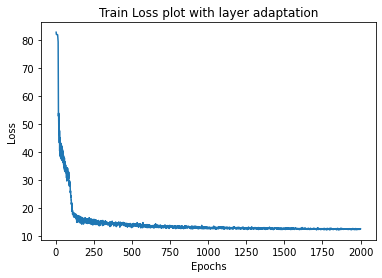

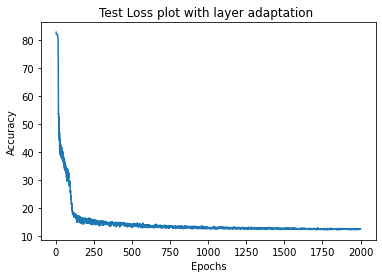

In [18]:
if __name__ == "__main__":     

    trainable=2
    #=== Hyperparameters and Run Options ===#    
    hyperp = Hyperparameters()
    hyperp_new=Hyperparameters_new()
    run_options = RunOptions()
    

    #=== File Names ===#
    file_paths = FilePaths(hyperp, run_options)
    
    #=== Load Data ===#       
    data_train, labels_train,\
    data_test, labels_test,\
    data_input_shape, num_channels, label_dimensions, data_train_inside, labels_train_inside\
    = load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed) 
    
    gauss_solution=np.loadtxt("gauss_solution.data")
    gauss_solution = tf.cast(gauss_solution,tf.float32)
    

    
    gauss_points = loadmat('gauss_points.mat')
    gauss_points=np.array(list(gauss_points.values()))[-1]
    gauss_points = tf.cast(gauss_points,tf.float32)
    
    gauss_points_new = loadmat('gauss_points_new.mat')
    gauss_points_new=np.array(list(gauss_points_new.values()))[-1]
    gauss_points_new = tf.cast(gauss_points_new,tf.float32)
    
    gauss_weights = loadmat('gauss_weights.mat')
    gauss_weights=np.array(list(gauss_weights.values()))[-1].squeeze(-1)
    
    gauss_weights_new = loadmat('gauss_weights_new.mat')
    gauss_weights_new=np.array(list(gauss_weights_new.values()))[-1].squeeze(-1)

    
    Coordinates = loadmat('Coordinates.mat')
    Coordinates=np.array(list(Coordinates.values()))[-1]
    Coordinates = tf.cast(Coordinates,tf.float32)
    
    
    Stiffness = loadmat('Stiffness.mat')
    Stiffness=np.array(list(Stiffness.values()))[-1]
    Stiffness = tf.cast(Stiffness,tf.float32)
    
    load = loadmat('observation.mat')
    load=np.array(list(load.values()))[-1]
    load=tf.cast(load,tf.float32)
    load=tf.reshape(load,(len(load),1))
    
    Solution = loadmat('Solution.mat')
    Solution=np.array(list(Solution.values()))[-1]
    Solution=tf.cast(Solution,tf.float32)
    Solution=tf.reshape(Solution,(len(Solution),1))
    
    

    v=[]
    for i in range(0,len(Solution)):
        if np.abs(Solution[i])<1e-10:
            v.append(i)
    
    #for i in range(1,hyperp.num_networks):
    for i in range(1,2):
    #=== Initiate training ===#
        #trainer(hyperp, run_options, file_paths,i) 
        if i>1:
            trainable=2

    
            
        if trainable==2:
        
        
        
            #=== GPU Settings ===#
            os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
            os.environ["CUDA_VISIBLE_DEVICES"] = run_options.which_gpu
    
            #=== Neural Network ===#
            if run_options.use_L1 == 0:
                kernel_regularizer = None
                bias_regularizer = None  
            else:
                kernel_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
                bias_regularizer = tf.keras.regularizers.l1(hyperp.regularization)
            
            
            multiply=0
        
            if multiply==0:

                data_train,new_label,labels_train,load,Solution=create_new(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i,load,Stiffness,Coordinates,Solution)
        
            if multiply==1:

                data_train,new_label,labels_train=create_new_multiply(data_train, labels_train,hyperp,hyperp_new, run_options, data_input_shape, label_dimensions,i)
     
        #=== Construct Validation Set and Batches ===# 
            data_and_labels_train, data_and_labels_val, data_and_labels_test,\
            num_data_train, num_data_val, num_data_test,\
            num_batches_train, num_batches_val, num_batches_test,data_and_labels_train_new\
            = form_train_val_test_batches(data_train, labels_train, \
                                      data_test, labels_test, \
                                      hyperp.batch_size, new_label, run_options.random_seed)
        
        
        if i==1 and trainable==2:
            NN = FCLayerwise(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer)    
            NN._set_inputs( data_train)
        if i>1:
            kernel_regularizer = None
            bias_regularizer = None
            NN = FCLayerwise_new(hyperp_new, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer) 
            NN._set_inputs( data_train)
    #=== Training ===#
    #                                 Training                                    #
###############################################################################
        if trainable>2:
            del NN
            NN = Final(hyperp, run_options, data_input_shape, label_dimensions,kernel_regularizer, bias_regularizer,trainable)   
            #NN._set_inputs(data_train)
            NN.load_weights("WEIGHTS"+'/'+"model_weights"+str(1)+str(trainable-1))
            #NN=tf.keras.models.load_model("WEIGHTS"+'/'+"model"+str(1)+str(trainable-1))
        


        if i==1:
            hyperp_n=hyperp
            optimize(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, data_loss_regression, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape,data_train,labels_train,multiply,trainable,compute_interior_loss,gauss_points,gauss_weights,error_L2,gauss_solution,gauss_points_new,gauss_weights_new,Coordinates, Stiffness, load,Solution,v,data_train_inside, labels_train_inside)   
        
        if i>1:
            hyperp_n=Hyperparameters_new()
            optimize_step(hyperp,hyperp_n, run_options, file_paths, NN, data_loss_classification, data_loss_regression, data_and_labels_train, data_and_labels_val, data_and_labels_test, label_dimensions, num_batches_train,data_and_labels_train_new,manifold_classification_new,hyperp.batch_size,run_options.random_seed,num_data_train,i,data_input_shape,data_train,labels_train,multiply,compute_interior_loss,gauss_points,gauss_weights,error_L2,gauss_solution,gauss_points_new,gauss_weights_new,Coordinates, Stiffness, load,Solution,v,data_train_inside, labels_train_inside)   
        
        #NN.save("WEIGHTS"+'/'+"model"+str(1)+str(trainable))
        if not os.path.exists("WEIGHTS"):
            os.makedirs("WEIGHTS")
        NN.save_weights("WEIGHTS"+'/'+"model_weights"+str(1)+str(trainable))
        
        if i==1:
            plot_fig(hyperp, run_options, file_paths,i,trainable+1)
            
        if i>1:
            plot_fig(hyperp_new, run_options, file_paths,i,3)
        
        
        #plot_sine(hyperp,hyperp_new, data_test, run_options, data_input_shape, label_dimensions,2,data_train, labels_train)
        
   
        
        
        
        
        
        
        
        

Text(0, 0.5, 'Accuracy')

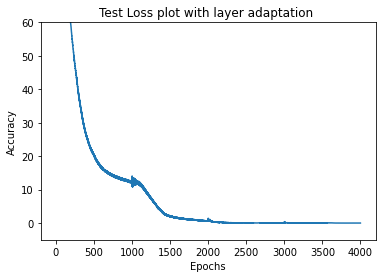

In [22]:
    import matplotlib.pyplot as plt
    
    storage_accuracy_array=[]
    
    no_epoch=hyperp.num_epochs
    
    for i in range(2,trainable):
    
        trainable_hidden_layer_index=i
    
    
        name=file_paths.NN_savefile_name + "_metrics_hl" + str(trainable_hidden_layer_index) +str(1)+ '.csv'


        df_metrics =pd.read_csv(name)

        array_metrics = df_metrics.to_numpy()

        
 
        storage_accuracy_array=np.concatenate((storage_accuracy_array, array_metrics[:,1]), axis=0)
    
    fig_accuracy = plt.figure()
    x_axis = np.linspace(1, len(storage_accuracy_array), len(storage_accuracy_array), endpoint = True)
    plt.plot(x_axis, storage_accuracy_array)
    plt.ylim(-5, 60)

#plt.title('Accuracy for: ' + run_options.filename)
    plt.title('Test Loss plot with layer adaptation ')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')


In [10]:
pred,new = NN(Coordinates)
loss=tf.matmul(Stiffness, pred)
loss_final=tf.math.reduce_sum(tf.keras.losses.MSE(load, loss))

In [12]:
tf.math.reduce_sum(tf.keras.losses.MSE(Solution, pred))

<tf.Tensor: id=6744890, shape=(), dtype=float32, numpy=178.8639>

In [22]:
G=tf.linalg.inv(Stiffness)

KeyboardInterrupt: 

In [166]:
    trainable=2
    
        
    hyperp = Hyperparameters()
    hyperp.max_hidden_layers=8
    hyperp_new=Hyperparameters_new()
    run_options = RunOptions()
    

    #=== File Names ===#
    file_paths = FilePaths(hyperp, run_options)
    
    #=== Load Data ===#       
    data_train, labels_train,\
    data_test, labels_test,\
    data_input_shape, num_channels, label_dimensions, data_train_inside, labels_train_inside\
    = load_data(file_paths.NN_type, file_paths.dataset, run_options.random_seed)  
 

In [194]:
data_test

<tf.Tensor: id=5958, shape=(5000, 2), dtype=float32, numpy=
array([[0.38106087, 0.1081669 ],
       [0.4594311 , 0.29319677],
       [0.1487638 , 0.29146183],
       ...,
       [0.79670495, 0.21184906],
       [0.86198735, 0.93216914],
       [0.58006227, 0.56983566]], dtype=float32)>

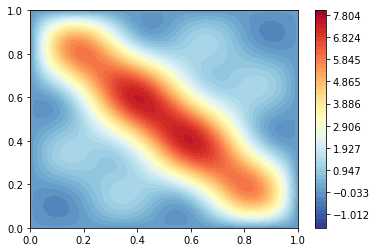

In [44]:
# TRUE SOLUTION

from Utilities.Net import Final_Network
import matplotlib.pyplot as plt

input_plot_data=np.loadtxt("input_plot_data.data")
output_plot_data=np.loadtxt("output_plot_data")


        
x = input_plot_data[:,0]
y = input_plot_data[:,1]

x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)


Z=tf.reshape(output_plot_data,np.shape(X))

fig = plt.figure()       

#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-1.6, 8, 50)
cs=plt.contourf(X, Y, Z,levels, cmap='RdYlBu_r',vmax=8, vmin=-1.6)      
#plt.contourf(X, Y, Z, 1000, cmap='RdYlBu_r', vmax=14.727704, vmin=0.) 
plt.colorbar() 

for c in cs.collections:
    c.set_rasterized(True)


plt.savefig('true_solution_simple.pdf')

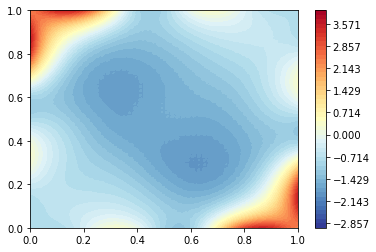

In [19]:
# NEURAL NETWORK SOLUTION
hyperp.max_hidden_layers=8
from Utilities.Net import Final_Network
import matplotlib.pyplot as plt

input_plot_data=np.loadtxt("input_plot_data.data")
output_plot_data=np.loadtxt("output_plot_data")


x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

d = []
for i in range(0,1000):
    for j in range(0,1000):
        dd=[X[i,j],Y[i,j]]
        d.append(dd) 

d=np.array(d)
data= tf.cast(d,tf.float32)
Network=Final_Network( hyperp,run_options, data_input_shape, label_dimensions) 
        
Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(12)).expect_partial()
    
y_pred_test_add=Network(data)

        
fig = plt.figure()       
Z1=tf.reshape(y_pred_test_add,np.shape(X))
Z1=tf.cast(Z1, tf.float32)

Z2=tf.reshape(output_plot_data,np.shape(X))
Z2=tf.cast(Z2, tf.float32)
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-3, 4, 50)
cs=plt.contourf(X, Y, Z1-Z2,levels, cmap='RdYlBu_r',vmax=4, vmin=-3)     
#plt.contourf(X, Y, Z, 1000, cmap='RdYlBu_r', vmax=14.727704, vmin=0.) 
plt.colorbar() 

for c in cs.collections:
    c.set_rasterized(True)


plt.savefig('model_constraint_1_Loss_2.557e+00_AConstraint_9.978.pdf')


In [179]:

Network.summary()

Model: "final__network_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
W2 (Dense)                   multiple                  10100     
_________________________________________________________________
W3 (Dense)                   multiple                  10100     
_________________________________________________________________
W4 (Dense)                   multiple                  10100     
_________________________________________________________________
W5 (Dense)                   multiple                  10100     
_________________________________________________________________
W6 (Dense)                   multiple                  10100     
_________________________________________________________________
W7 (Dense)                   multiple                  10100     
_________________________________________________________________
upsampling_layer (Dense)     multiple            

In [59]:
Z1

<tf.Tensor: id=69599461, shape=(1000, 1000), dtype=float32, numpy=
array([[-0.4377814 , -0.4384113 , -0.43907696, ...,  0.6786639 ,
         0.6692168 ,  0.6599204 ],
       [-0.4390183 , -0.4396544 , -0.4403196 , ...,  0.68716305,
         0.6777913 ,  0.6685559 ],
       [-0.44027668, -0.4409104 , -0.44156796, ...,  0.6958243 ,
         0.68649834,  0.677344  ],
       ...,
       [ 0.7147649 ,  0.7234517 ,  0.7322677 , ..., -0.49551088,
        -0.49341398, -0.49127632],
       [ 0.7062531 ,  0.71505386,  0.7239718 , ..., -0.49414998,
        -0.49206692, -0.48995334],
       [ 0.69798154,  0.70689267,  0.71591085, ..., -0.49274093,
        -0.49067622, -0.48857123]], dtype=float32)>

In [25]:
tf.keras.losses.MSE(load, aa)

<tf.Tensor: id=652, shape=(961,), dtype=float32, numpy=
array([7.34591999e-31, 2.71296829e-01, 2.71296829e-01, 1.00600421e+00,
       3.55271368e-15, 1.00600421e+00, 1.91142833e+00, 5.68434189e-14,
       5.68434189e-14, 1.91142833e+00, 2.63079333e+00, 8.88178420e-14,
       8.88178420e-14, 8.88178420e-14, 2.63079333e+00, 2.90322709e+00,
       7.19424520e-14, 5.68434189e-14, 5.68434189e-14, 1.50102153e-13,
       2.90322709e+00, 2.66453648e+00, 3.19744231e-14, 1.42108547e-14,
       1.74082970e-13, 1.27897692e-13, 3.55271368e-15, 2.66453648e+00,
       2.04844165e+00, 8.88178420e-14, 1.27897692e-13, 1.56674673e-12,
       6.00408612e-13, 1.42108547e-14, 3.55271368e-15, 2.04844165e+00,
       1.29939556e+00, 2.68673972e-14, 1.50102153e-13, 6.00408612e-13,
       2.87769808e-13, 6.00408612e-13, 7.46958051e-13, 9.79216708e-14,
       1.29939556e+00, 6.50586665e-01, 9.33142452e-14, 2.22044605e-14,
       5.11590770e-13, 8.88178420e-14, 8.88178420e-14, 5.11590770e-13,
       2.22044605e-14

In [26]:
load-aa

<tf.Tensor: id=653, shape=(961, 1), dtype=float32, numpy=
array([[ 8.57083417e-16],
       [ 5.20861626e-01],
       [ 5.20861626e-01],
       [ 1.00299764e+00],
       [ 5.96046448e-08],
       [ 1.00299764e+00],
       [ 1.38254416e+00],
       [ 2.38418579e-07],
       [ 2.38418579e-07],
       [ 1.38254416e+00],
       [ 1.62197208e+00],
       [-2.98023224e-07],
       [-2.98023224e-07],
       [-2.98023224e-07],
       [ 1.62197208e+00],
       [ 1.70388591e+00],
       [ 2.68220901e-07],
       [ 2.38418579e-07],
       [ 2.38418579e-07],
       [ 3.87430191e-07],
       [ 1.70388591e+00],
       [ 1.63234079e+00],
       [-1.78813934e-07],
       [-1.19209290e-07],
       [-4.17232513e-07],
       [ 3.57627869e-07],
       [-5.96046448e-08],
       [ 1.63234079e+00],
       [ 1.43123782e+00],
       [ 2.98023224e-07],
       [ 3.57627869e-07],
       [ 1.25169754e-06],
       [ 7.74860382e-07],
       [-1.19209290e-07],
       [-5.96046448e-08],
       [ 1.43123782e+00],
      

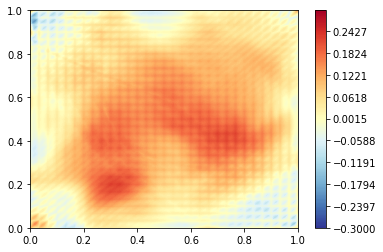

In [80]:
# NEURAL NETWORK SOLUTION

from Utilities.Net import Final_Network
import matplotlib.pyplot as plt


i_val=2


x = np.linspace(0, 1, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)

d = []
for i in range(0,1000):
    for j in range(0,1000):
        dd=[X[i,j],Y[i,j]]
        d.append(dd) 

d=np.array(d)
data= tf.cast(d,tf.float32)


i_val=i_val+1
    
    
if i_val>1:
    for i_net in range(2,i_val+1):
                
        if i_net==2:    
            Network=Final_Network( hyperp,run_options, data_input_shape, label_dimensions) 
        
            Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(i_net-1)).expect_partial()
    
            y_pred_test_add=Network(data)
        
        if i_net>2:
                
            Network=Final_Network_ALGO_II( hyperp_new,run_options, data_input_shape, label_dimensions) 
        
            Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(i_net-1)).expect_partial()
    
            y_pred_test_add=y_pred_test_add+Network(data)
        


     
fig = plt.figure()       
Z=tf.reshape((output_plot_data-y_pred_test_add[:,0]),np.shape(X))
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-0.3, 0.3, 200)
cs=plt.contourf(X, Y, Z,levels, cmap='RdYlBu_r',vmax=0.3, vmin=-0.3)     
#plt.contourf(X, Y, Z, 1000, cmap='RdYlBu_r', vmax=14.727704, vmin=0.) 
plt.colorbar() 

for c in cs.collections:
    c.set_rasterized(True)


plt.savefig('error_one_simple.pdf')




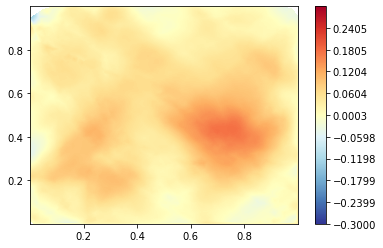

In [105]:
# PLOT ERROR MAP

from Utilities.Net import Final_Network
import matplotlib.pyplot as plt


i_val=7



data= data_test


i_val=i_val+1
    
    
if i_val>1:
    for i_net in range(2,i_val+1):
                
        if i_net==2:    
            Network=Final_Network( hyperp,run_options, data_input_shape, label_dimensions) 
        
            Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(i_net-1)).expect_partial()
    
            y_pred_test_add=Network(data)
        
        if i_net>2:
                
            Network=Final_Network_ALGO_II( hyperp_new,run_options, data_input_shape, label_dimensions) 
        
            Network.load_weights("WEIGHTS"+'/'+"model_weights"+str(i_net-1)).expect_partial()
    
            y_pred_test_add=y_pred_test_add+Network(data)
        

x = data_test[:,0]
y = data_test[:,1]
     
     
fig = plt.figure()   
#clevels = np.linspace(0.0019333754, 14.727704, 10000)
levels=np.linspace(-0.3, 0.3, 1000)
cs = plt.tricontourf(x, y, labels_test-y_pred_test_add[:,0], levels, cmap='RdYlBu_r', vmax=0.3, vmin=-0.3)
plt.colorbar(cs)


for c in cs.collections:
    c.set_rasterized(True)


plt.savefig('error_six_simple.pdf')

